<a href="https://colab.research.google.com/github/AhmadAlabrash/NLP/blob/main/NLP_naive_bayes_MultiNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB

In [6]:
df = pd.read_csv("/content/sp.csv")
df


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
df['cate_num'] = df.Category.map({
    'ham' : 0 ,
    'spam' : 1 
})

In [12]:
df

,Category,Message,cate_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [13]:
from sklearn.model_selection import train_test_split
X,x,Y,y =train_test_split(df.Message,df.cate_num,train_size=0.8)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('co',CountVectorizer()),
    ('mo',MultinomialNB())
])
clf.fit(X,Y)

Pipeline(steps=[('co', CountVectorizer()), ('mo', MultinomialNB())])

In [19]:
y_pr = clf.predict(x)

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y,y_pr)


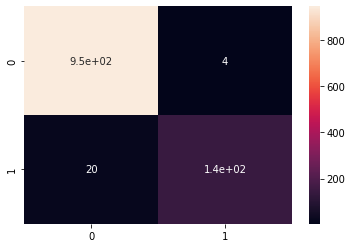

In [29]:
import seaborn as sns


sns.heatmap(cm,annot=True)